#Import Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Dataset and Exploration

In [5]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n2,138,62,35,0,33.6,0.127,47,1\n0,84,82,31,125,38.2,0.233,23,0\n0,145,0,0,0,44.2,0.63,31,1\n0,135,68,42,250,42.3,0.365,24,1\n1,139,62,41,480,40.7,0.536,21,0\n0,173,78,32,265,46.5,1.159,58,0\n4,99,72,17,0,25.6,0.294,28,0\n8,194,80,0,0,26.1,0.551,67,0\n2,83,65,28,66,36.8,0.629,24,0\n2,89,90,30,0,33.5,0.292,42,0\n4,99,68,38,0,32.8,0.145,33,0\n4,125,70,18,122,28.9,1.144,45,1\n3,80,0,0,0,0,0.174,22,0\n6,166,74,0,0,26.6,0.304,66,0\n5,110,68,0,0,26,0.292,30,0\n2,81,72,15,76,30.1,0.547,25,0\n7,195,70,33,145,25.1,0.163,55,1\n6,154,74,32,193,29.3,0.839,39,0\n2,117,90,19,71,25.2,0.313,21,0\n3,84,72,32,0,37.2,0.267,28,0\n6,0,68,41,0,39,0.727,41,1\n7,94,64,25,79,33.3,0.738,41,0\n3,96,78,39,0,37.3,0.238,40,0\n10,75,82,0,0,33.3,0.263,38,0\n0,180,90,26,90,36.5,0.314,35,1\n1,130,60,23,170,28.6,0.692,21,0\n2,84,50,23,76,30.4,0.968,21,0\n8,120,78,0,0,25,0.409,64,0\n12,84,72,31,0,29.7,0.297,

In [7]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


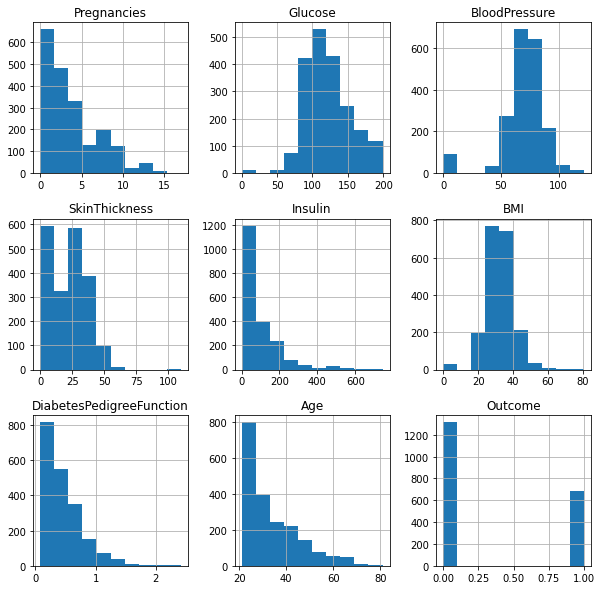

In [11]:
data.hist(bins=10, figsize=(10,10))
plt.show()

In [16]:
#lets extract features and targets
X=data.drop(columns=['Outcome'])
y=data['Outcome']

#Preprocessing

In [12]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [14]:
# Replace/Drop
# data.drop('Pregnancies', axis=1, inplace=True)

# Mean
# rata = data['var'].mean()
# data['var'] = data['Pregnancies'].fillna(rata)
# data['var'].isna().sum()

# Modus
# modus = data['var'].mode()[0]
# data['var'] = data['var'].fillna(modus)
# data['var'].isna().sum()

#Split Dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 8), (600, 8), (1400,), (600,))

#Model and Prediction

In [23]:
#Naive Bayes Theorem

from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred = model.predict(X_test)

#Evaluation

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [26]:
print(accuracy_score(y_test, y_pred))

0.74


In [27]:
print(roc_auc_score(y_test, y_pred))

0.6825


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       400
           1       0.64      0.51      0.57       200

    accuracy                           0.74       600
   macro avg       0.71      0.68      0.69       600
weighted avg       0.73      0.74      0.73       600



In [31]:
confusion_matrix(y_test, y_pred)

array([[342,  58],
       [ 98, 102]])